データ分析

In [1]:
import pandas as pd
from tqdm import tqdm
from collections import defaultdict

# user_tags.csv ファイルを読み込み
user_tags_df = pd.read_csv("user_tags.csv")

# 各タグを保持しているユーザーのマッピングを構築
tag_to_users = defaultdict(set)

# tqdmを使用して進捗バーを表示
for _, row in tqdm(user_tags_df.iterrows(), desc="Processing users", total=len(user_tags_df)):
    user_id = row["user_id"]
    tags = row["tags"]
    if isinstance(tags, str):
        # 文字列をセットに変換
        tag_set = set(tags.strip("{}").replace("'", "").split(", "))
        for tag in tag_set:
            tag_to_users[tag].add(user_id)


Processing users: 100%|██████████| 784309/784309 [00:32<00:00, 24291.00it/s]


In [2]:
from collections import OrderedDict

# ユーザーが多いスキルから順に並び替え
tag_to_users = OrderedDict(
    sorted(tag_to_users.items(), key=lambda x: len(x[1]), reverse=True)
)

# 各スキルごとのユーザー数を出力
tag_user_counts = {tag: len(users) for tag, users in tag_to_users.items()}
print("Number of users per tag:")
for tag, count in tag_user_counts.items():
    print(f"Tag {tag}: {count} users")

Number of users per tag:
Tag 183: 523192 users
Tag 24: 470593 users
Tag 184: 470154 users
Tag 185: 456976 users
Tag 182: 456191 users
Tag 74: 423381 users
Tag 181: 382191 users
Tag 2: 359621 users
Tag 179: 357527 users
Tag 83: 352846 users
Tag 85: 347250 users
Tag 71: 342769 users
Tag 7: 335328 users
Tag 76: 327192 users
Tag 78: 305163 users
Tag 77: 300528 users
Tag 26: 299617 users
Tag 6: 286295 users
Tag 30: 282495 users
Tag 5: 270166 users
Tag 11: 261914 users
Tag 84: 254625 users
Tag 96: 245935 users
Tag 130: 242310 users
Tag 75: 232575 users
Tag 100: 232469 users
Tag 119: 229925 users
Tag 44: 227267 users
Tag 145: 226352 users
Tag 52: 223872 users
Tag 55: 220596 users
Tag 34: 219581 users
Tag 31: 218187 users
Tag 80: 218032 users
Tag 32: 213816 users
Tag 53: 212496 users
Tag 54: 201875 users
Tag 143: 201872 users
Tag 57: 195286 users
Tag 64: 189923 users
Tag 59: 187872 users
Tag 98: 187754 users
Tag 45: 187693 users
Tag 149: 184380 users
Tag 28: 184230 users
Tag 153: 183093 users


In [3]:
# 特定のタグを持つ共通ユーザーを絞り込む
def get_users_with_tags(*tags):
    tag_sets = [tag_to_users[tag] for tag in tags if tag in tag_to_users]
    if tag_sets:
        common_users = set.intersection(*tag_sets)
        return common_users
    return set()

In [4]:
# 例: "tag1" と "tag2" を両方保持しているユーザー
tags_to_check = ["219", "186"]
common_users = get_users_with_tags(*tags_to_check)
print(f"Users holding tags {tags_to_check}: {common_users}")

Users holding tags ['219', '186']: {'u52579', 'u4193', 'u54897', 'u1293', 'u20864', 'u7203', 'u42965', 'u45319', 'u7326', 'u535', 'u373', 'u19844', 'u11774', 'u2551', 'u45284', 'u17507'}


In [14]:
# 185-240, 184-1247
topk = 184
# topk個のタグを取得
top_tags = list(tag_to_users.keys())[:topk]

# topk個のタグに関連付けられたユーザーを絞り込み
if top_tags:
    common_users = set.intersection(*(tag_to_users[tag] for tag in top_tags))
else:
    common_users = set()

# 結果を出力
print(f"Top {topk} tags: {top_tags}")
print(f"Common users for top {topk} tags: {common_users}")
print(f"Number of common users: {len(common_users)}")

Top 184 tags: ['183', '24', '184', '185', '182', '74', '181', '2', '179', '83', '85', '71', '7', '76', '78', '77', '26', '6', '30', '5', '11', '84', '96', '130', '75', '100', '119', '44', '145', '52', '55', '34', '31', '80', '32', '53', '54', '143', '57', '64', '59', '98', '45', '149', '28', '153', '49', '90', '35', '156', '177', '27', '115', '40', '33', '169', '38', '42', '39', '152', '29', '37', '36', '25', '50', '86', '43', '87', '81', '112', '103', '23', '47', '106', '46', '72', '121', '82', '120', '94', '88', '116', '133', '129', '134', '95', '114', '107', '105', '104', '122', '118', '93', '48', '73', '117', '97', '92', '123', '109', '41', '126', '99', '113', '51', '108', '128', '144', '110', '135', '132', '124', '140', '111', '125', '136', '142', '79', '138', '137', '101', '89', '91', '9', '18', '4', '102', '14', '131', '20', '21', '8', '17', '19', '15', '22', '16', '12', '141', '56', '1', '10', '58', '13', '3', '180', '178', '151', '60', '150', '148', '63', '162', '146', '155', 

In [6]:
import matplotlib.pyplot as plt

# グラフ用のデータを準備
tag_counts = []
common_user_counts = []

# タグ数を20から順に増やして計算
for num_tags in tqdm(range(20, len(tag_to_users) + 1)):
    # 上位 num_tags 個のタグを取得
    top_tags = list(tag_to_users.keys())[:num_tags]
    # 共通ユーザーを絞り込み
    common_users = set.intersection(*(tag_to_users[tag] for tag in top_tags))
    # データを保存
    tag_counts.append(num_tags)
    common_user_counts.append(len(common_users))

100%|██████████| 169/169 [00:56<00:00,  3.01it/s]


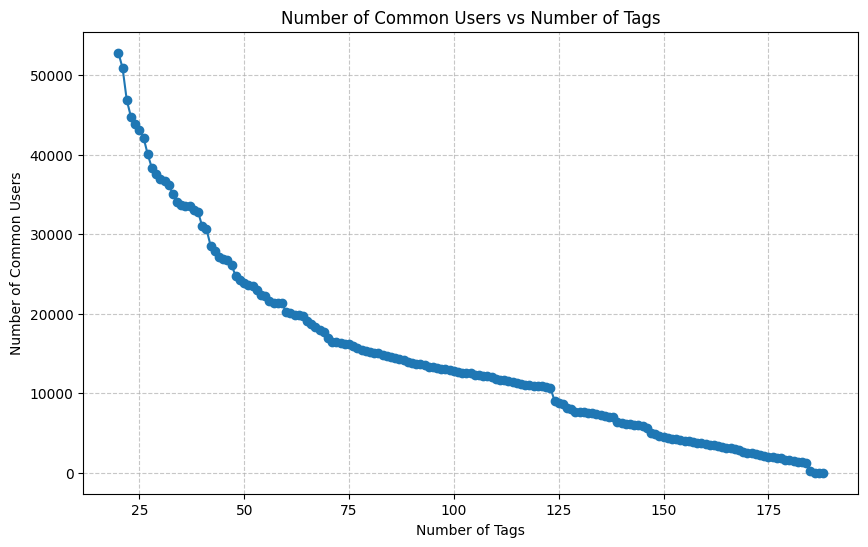

In [7]:
# グラフを作成
plt.figure(figsize=(10, 6))
plt.plot(tag_counts, common_user_counts, marker="o", linestyle="-")
plt.title("Number of Common Users vs Number of Tags")
plt.xlabel("Number of Tags")
plt.ylabel("Number of Common Users")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [9]:
# if -1 in numeric_tags:
#     print("Tag -1 found.")
# else:
#     print("Tag -1 not found.")

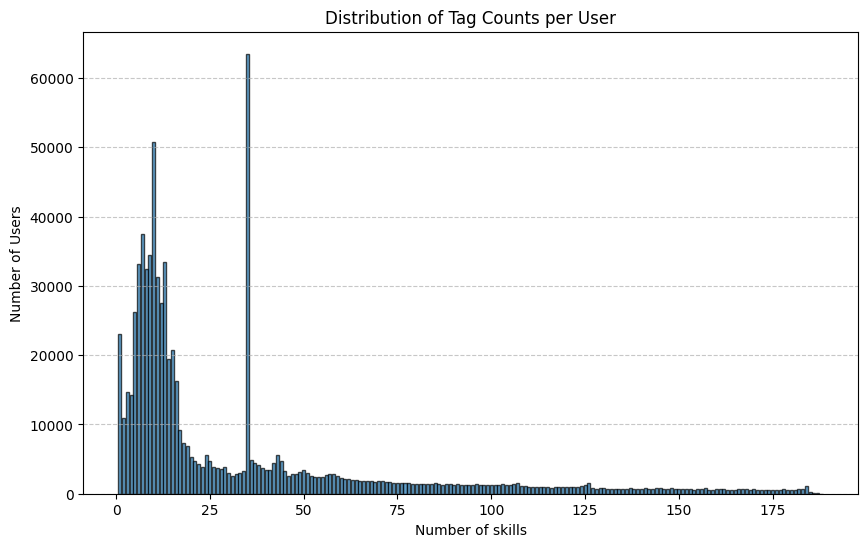

Tag count distribution summary:
count    784309.000000
mean         33.195630
std          39.208219
min           1.000000
25%           9.000000
50%          15.000000
75%          39.000000
max         188.000000
Name: tag_count, dtype: float64


In [10]:
import matplotlib.pyplot as plt

# タグ数の分布を確認
tag_counts = user_tags_df["tag_count"]

# データの要約で頻度分布を作成
frequency = tag_counts.value_counts().sort_index()

# ヒストグラムを描画
plt.figure(figsize=(10, 6))
plt.bar(frequency.index, frequency.values, edgecolor="black", alpha=0.7)
plt.title("Distribution of Tag Counts per User")
plt.xlabel("Number of skills")
plt.ylabel("Number of Users")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# タグ数の分布の要約統計量を表示
print("Tag count distribution summary:")
print(tag_counts.describe())
